<br><br><br>
# Introdução:

## Detecção de Anomalias

Através de um dataset do ramo de aviação, irei construir um modelo para prever se um motor está apto para uso ou não, a partir do momento em que ele é construído.

Pelas medidas de calor gerado e intensidade de vibração, poderei saber se o motor é considerado ou não uma anomalia, dado uma base histórica que está apta, ou seja, que já foram testadas e funcionam bem.


<br><br>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

Ao construir um motor no ramo da aviação, o motor vem com as informações de vibração e calor. A partir daí, irei construir um modelo para detecção de anomalias.

In [2]:
df = pd.read_csv("dataset_deteccao_anomalias_motor_aviacao.csv")
print(df.shape)
df.head()

(150, 2)


,calor,vibracao
0,9.353765,20.449382
1,9.600833,19.464194
2,9.474736,20.399310
3,10.907298,21.550562
4,9.650701,19.057824


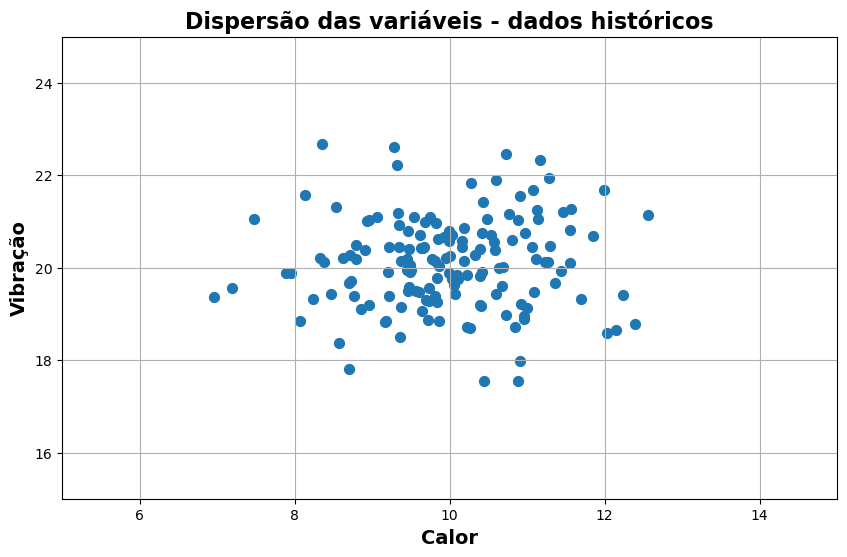

In [3]:
plt.figure(figsize=[10,6])
plt.title("Dispersão das variáveis - dados históricos",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

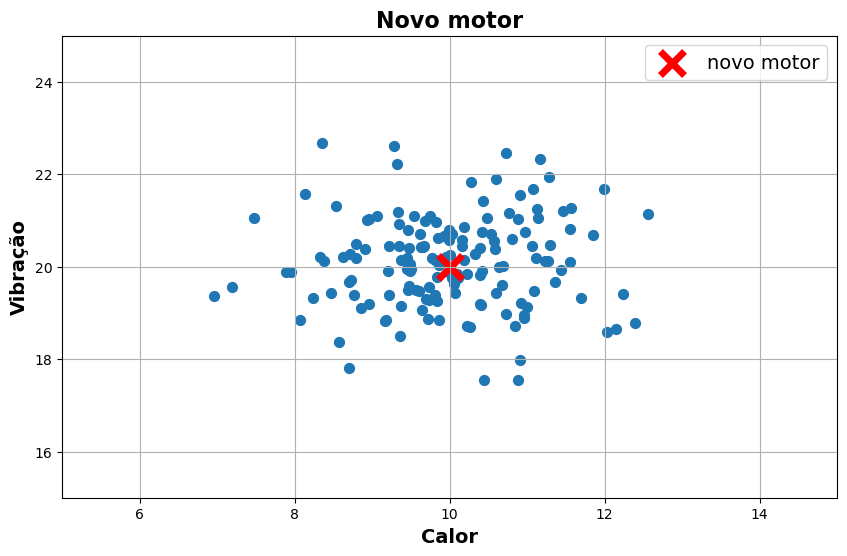

In [19]:
calor_novoMotor = 10
vibracao_novoMotor = 20

plt.figure(figsize=[10,6])
plt.title("Novo motor",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

<br><br>

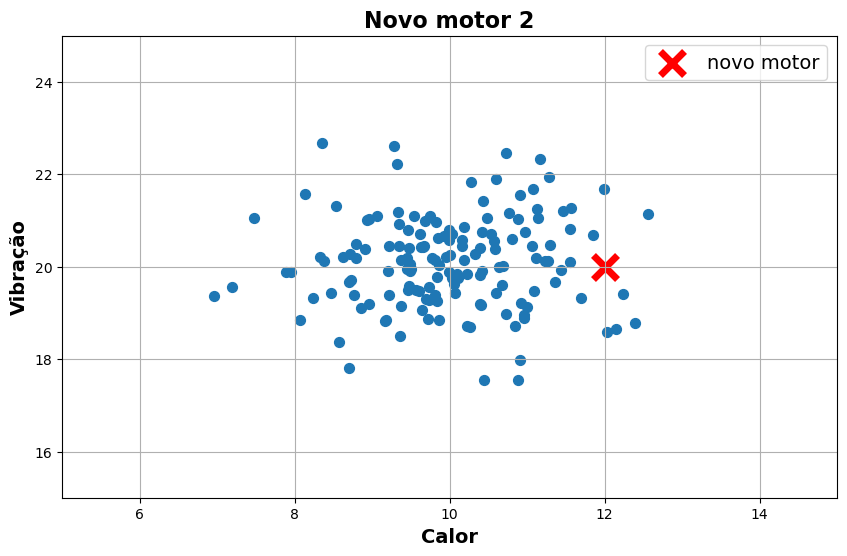

In [20]:
calor_novoMotor = 12
vibracao_novoMotor = 20

plt.figure(figsize=[10,6])
plt.title("Novo motor 2",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

<br><br>

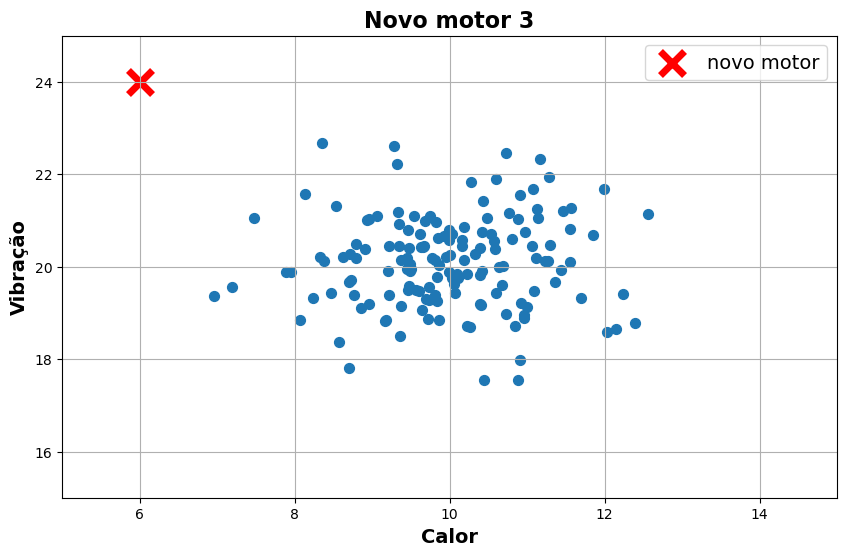

In [21]:
calor_novoMotor = 6
vibracao_novoMotor = 24

plt.figure(figsize=[10,6])
plt.title("Novo motor 3",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

In [7]:
class DetectorAnomalias():
    
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def fit(self, X):
        medias = X.mean(axis = 0)
        desvios = X.std(axis = 0)
        gaussianas = [st.norm(loc = m, scale = d) for m, d in zip(medias, desvios)]  
        self.gaussianas = gaussianas
        self.X = X
        
    def prob(self, x):
        p = 1
        for i in range(self.X.shape[1]):
            gaussiana_i = self.gaussianas[i]
            x_i = x[i]
            p *= gaussiana_i.pdf(x_i)
        return p
    
    def isAnomaly(self, x):
        return int(np.where(self.prob(x) < self.epsilon, 1, 0))

In [8]:
df.head()

,calor,vibracao
0,9.353765,20.449382
1,9.600833,19.464194
2,9.474736,20.399310
3,10.907298,21.550562
4,9.650701,19.057824


In [9]:
X = df.values

In [10]:
#instanciando o algoritmo
ann = DetectorAnomalias(epsilon = 0.001)
ann.fit(X)

In [11]:
#fazendo testes
x = X[0, ]
x

array([ 9.35376523, 20.44938184])

In [12]:
ann.prob(x)

0.11968282091264956

In [13]:
ann.isAnomaly(x)

0

In [14]:
x_teste = np.array([6,20])
x_teste

array([ 6, 20])

In [15]:
print(ann.prob(x_teste))
print(ann.isAnomaly(x_teste))

0.00012932693620458041
1


<br>

Vamos, abaixo, plotar alguns gráficos que resumem o resultado do algoritmo.

Plotaremos as curvas de probabilidade de cada ponto e a divisão binária entre ser ou não uma anomalia.

Além disso, vamos comparar dois detectores de anomalia com limiares distintos e ver como isso afeta as predições.

<br>

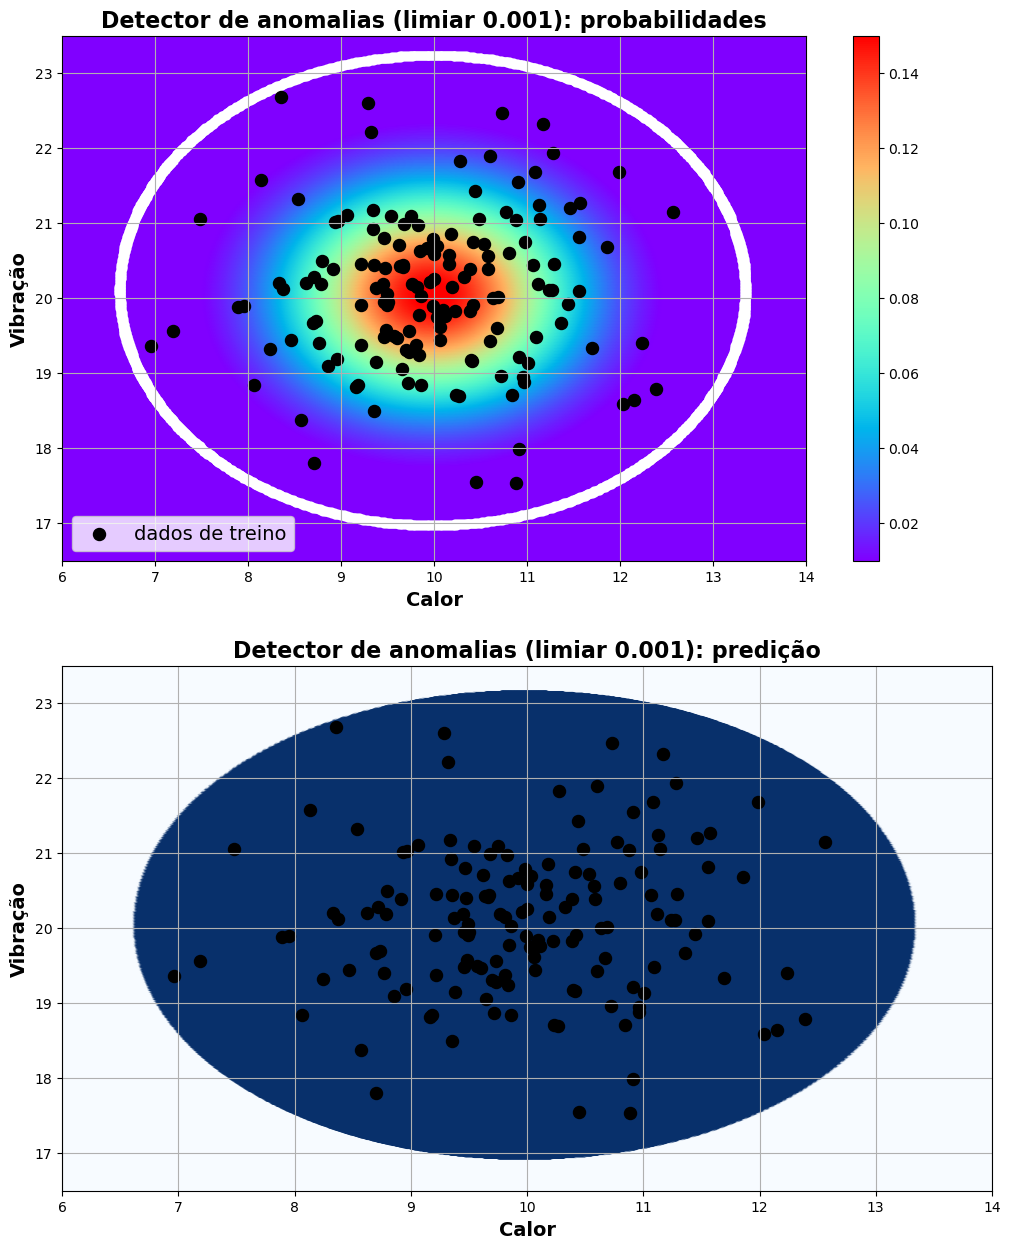

In [16]:
xx = np.arange(6,14, 0.01)
yy = np.arange(16.5,23.5, 0.01)

xx0, xx1 = np.meshgrid(xx, yy)
grid0 = xx0.ravel()
grid1 = xx1.ravel()
grid = np.c_[grid0, grid1]

lista_anomalia = []
lista_prob = []
L=[]
for x in grid: #selecionando os pontos cuja probabilidade está muito próxima do limiar epsilon pré-fixado.
    lista_anomalia.append( ann.isAnomaly(x) )
    lista_prob.append( ann.prob(x) )
    
    if (( (ann.epsilon - 0.0001) < ann.prob(x)) & ((ann.epsilon + 0.0001) > ann.prob(x))):
        L.append(x)
    
plt.figure(figsize=[12,15])
plt.subplot(2,1,1)
plt.scatter(grid0, grid1, c = lista_prob, cmap = plt.cm.rainbow)
plt.clim(0.01, 0.15)
plt.colorbar()
for l in L:
    plt.scatter(l[0], l[1], c = 'white', s = 10)

plt.title("Detector de anomalias (limiar 0.001): probabilidades",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black', label = 'dados de treino')
plt.legend(loc = 'lower left', fontsize = 14)

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.subplot(2,1,2)
plt.title("Detector de anomalias (limiar 0.001): predição",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(grid0, grid1, c = lista_anomalia, cmap = plt.cm.Blues_r)
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black')

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.show()

<br><br>

__Alterando o limiar (aumentá-lo 10x) e comparando os resultados:__

<br><br>

In [17]:
ann = DetectorAnomalias(epsilon = 0.01)
ann.fit(X)

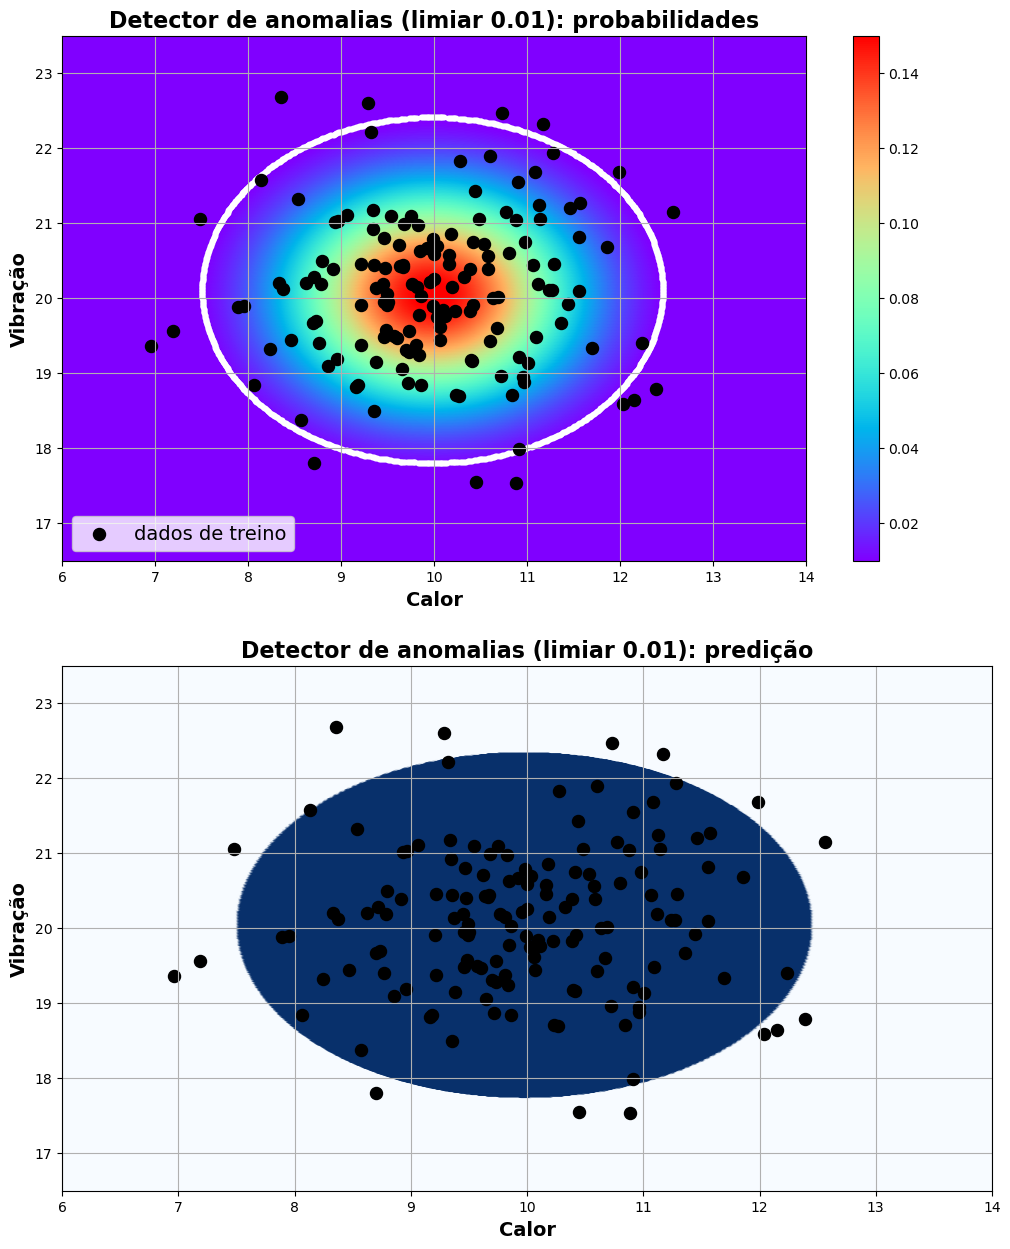

In [18]:
xx = np.arange(6,14, 0.01)
yy = np.arange(16.5,23.5, 0.01)

xx0, xx1 = np.meshgrid(xx, yy)
grid0 = xx0.ravel()
grid1 = xx1.ravel()
grid = np.c_[grid0, grid1]

lista_anomalia = []
lista_prob = []
L=[]
for x in grid:
    lista_anomalia.append( ann.isAnomaly(x) )
    lista_prob.append( ann.prob(x) )
    
    if (( (ann.epsilon - 0.0001) < ann.prob(x)) & ((ann.epsilon + 0.0001) > ann.prob(x))):
        L.append(x)
    
plt.figure(figsize=[12,15])
plt.subplot(2,1,1)
plt.scatter(grid0, grid1, c = lista_prob, cmap = plt.cm.rainbow)
plt.clim(0.01, 0.15)
plt.colorbar()
for l in L:
    plt.scatter(l[0], l[1], c = 'white', s = 10)

plt.title("Detector de anomalias (limiar 0.01): probabilidades",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black', label = 'dados de treino')
plt.legend(loc = 'lower left', fontsize = 14)

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.subplot(2,1,2)
plt.title("Detector de anomalias (limiar 0.01): predição",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(grid0, grid1, c = lista_anomalia, cmap = plt.cm.Blues_r)
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black')

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.show()